# Assignment 5 Question 1

## Problem Statement

##### Prepare a prediction model for profit of 50_startups data.
Do transformations for getting better predictions of profit and
make a table containing R^2 value for each prepared model.

**Field Description**
- **R&D Spend** -- Research and devolop spend in the past few years
- **Administration** -- spend on administration in the past few years
- **Marketing Spend** -- spend on Marketing in the past few years
- **State** -- states from which data is collected
- **Profit**  -- profit of each state in the past few years


In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf
from statsmodels.graphics.regressionplots import influence_plot
import matplotlib.pyplot as plt

In [2]:
# Loading data
df = pd.read_csv('50_Startups.csv')
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [3]:
# Renaming the columns
col_renamed = [col.strip().replace(' ','_') for col in df.columns]
col_renamed[0] = 'R_D_Spend'
col_renamed

['R_D_Spend', 'Administration', 'Marketing_Spend', 'State', 'Profit']

In [4]:
df.columns = col_renamed
df.head(2)

,R_D_Spend,Administration,Marketing_Spend,State,Profit
0,165349.2,136897.80,471784.10,New York,192261.83
1,162597.7,151377.59,443898.53,California,191792.06


## Exploratory Data Analysis

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R_D_Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing_Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


There are no NULL values. Will proceed with next steps

In [8]:
df.isna().sum()

R_D_Spend          0
Administration     0
Marketing_Spend    0
State              0
Profit             0
dtype: int64

In [9]:
# Correlation Matrix
df.corr()

,R_D_Spend,Administration,Marketing_Spend,Profit
R_D_Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing_Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


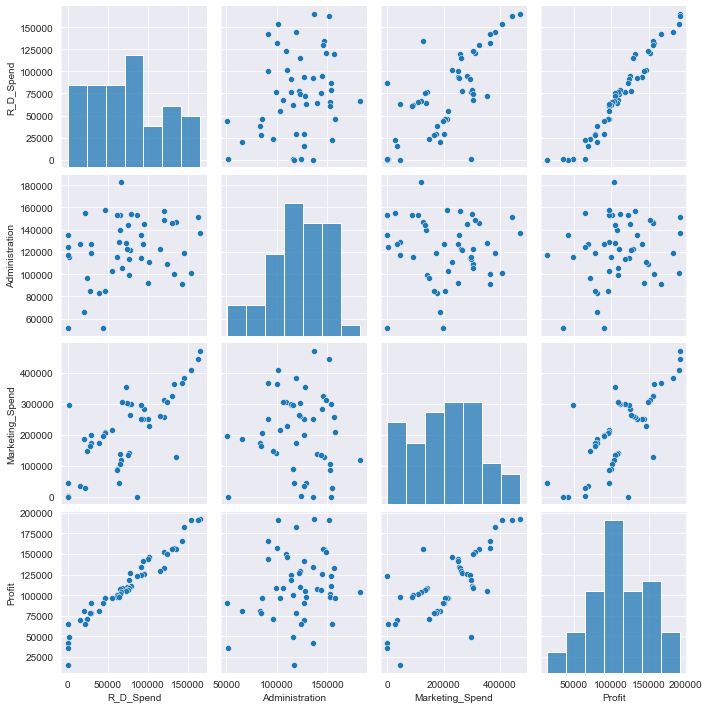

In [10]:
# Scatterplot matrix
sns.set_style('darkgrid')
sns.pairplot(df)

##### **Insights**
##### - `Profit` and `R&D_Spend` seems to have a high positive correlation
##### - `Profit` and `Marketing_Spend` seems to have a high positive correlation
##### - `Profit` and `Administration` seems to have no correlation

## Preparing Model 1

In [12]:
model = smf.ols('Profit~R_D_Spend+Administration+Marketing_Spend', data=df).fit()
# print(model.summary())

In [13]:
model.params

Intercept          50122.192990
R_D_Spend              0.805715
Administration        -0.026816
Marketing_Spend        0.027228
dtype: float64

In [14]:
print(model.tvalues, '\n', model.pvalues)

Intercept           7.626218
R_D_Spend          17.846374
Administration     -0.525507
Marketing_Spend     1.655077
dtype: float64 
 Intercept          1.057379e-09
R_D_Spend          2.634968e-22
Administration     6.017551e-01
Marketing_Spend    1.047168e-01
dtype: float64


In [15]:
model.rsquared, model.rsquared_adj, model.aic

(0.9507459940683246, 0.9475337762901719, 1058.7714985998055)

##### **Insight**
##### - From pvalues it can be observed that `Administration` & `Marketing_Spend` are insignificant variables

## Initiating the list to store the R-Square Values for every model

In [16]:
R_Squared_list = []
model_r_square = ['model',model.rsquared]
R_Squared_list.append(model_r_square)
R_Squared_list

[['model', 0.9507459940683246]]

## Linear Models for Insignificant variables `Administration` & `Marketing_Spend` 
## & get their `pvalues`

In [17]:
slr_model_Ad = smf.ols('Profit~Administration', data=df).fit()
slr_model_Ad.tvalues, slr_model_Ad.pvalues

(Intercept         3.040044
 Administration    1.419493
 dtype: float64,
 Intercept         0.003824
 Administration    0.162217
 dtype: float64)

##### **Insight**
##### - `Administration` has in-significant pvalue

In [18]:
slr_model_MS = smf.ols('Profit~Marketing_Spend', data=df).fit()
slr_model_MS.tvalues, slr_model_MS.pvalues

(Intercept          7.808356
 Marketing_Spend    7.802657
 dtype: float64,
 Intercept          4.294735e-10
 Marketing_Spend    4.381073e-10
 dtype: float64)

##### **Insight**
##### - `Marketing_Spend` has significant pvalue

In [19]:
slr_model_Ad_MS = smf.ols('Profit~Administration+Marketing_Spend', data=df).fit()
slr_model_Ad_MS.tvalues, slr_model_Ad_MS.pvalues

(Intercept          1.142741
 Administration     2.467779
 Marketing_Spend    8.281039
 dtype: float64,
 Intercept          2.589341e-01
 Administration     1.729198e-02
 Marketing_Spend    9.727245e-11
 dtype: float64)

##### **Insight**
##### - Variables have significant pvalue

## Model Validation

### 1. Collinearity Check
**VIF** = 1/(1-RSquare)

In [20]:
rsq_r = smf.ols('R_D_Spend~Administration+Marketing_Spend',data=df).fit().rsquared
vif_r = 1/(1-rsq_r)

rsq_a = smf.ols('Administration~Marketing_Spend+R_D_Spend',data=df).fit().rsquared
vif_a = 1/(1-rsq_a)

rsq_m = smf.ols('Marketing_Spend~Administration+R_D_Spend',data=df).fit().rsquared
vif_m = 1/(1-rsq_m)

vif_r, vif_a, vif_m

(2.4689030699947017, 1.1750910070550453, 2.326773290530878)

In [21]:
# Putting the values in a DataFrame
df_vif = pd.DataFrame({'Variables':['R_D_Spend','Administration','Marketing_Spend'], 'VIF':[vif_r, vif_a, vif_m]})
df_vif

,Variables,VIF
0,R_D_Spend,2.468903
1,Administration,1.175091
2,Marketing_Spend,2.326773


##### **Insight**
##### - None of the variables has VIF>20, So no collinearity. Hence, will consider all the variables in the Regression Model

### 1. Residual Analysis
Test for Normality of Residuals (Q-Q Plot) using residual model

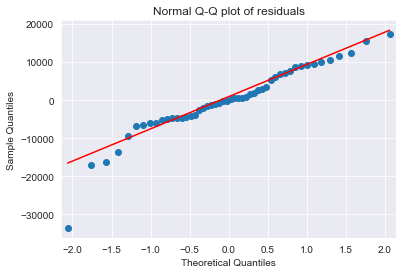

In [22]:
import statsmodels.api as sm
qqplot = sm.qqplot(model.resid, line='q')
plt.title('Normal Q-Q plot of residuals')
plt.show()

In [23]:
list(np.where(model.resid< -30000))

[array([49])]

##### **Insights**
##### -Index 49 seems like an outlier

### Residual Plot for Homoscedasticity

In [24]:
def get_standardized_values(vals):
    return (vals-vals.mean())/vals.std()

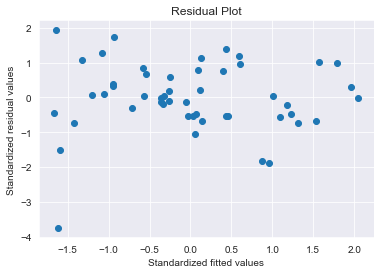

In [25]:
plt.scatter(get_standardized_values(model.fittedvalues),get_standardized_values(model.resid))
plt.title('Residual Plot')
plt.xlabel('Standardized fitted values')
plt.ylabel('Standardized residual values')
plt.show()

### Residual vs Regressors

eval_env: 1


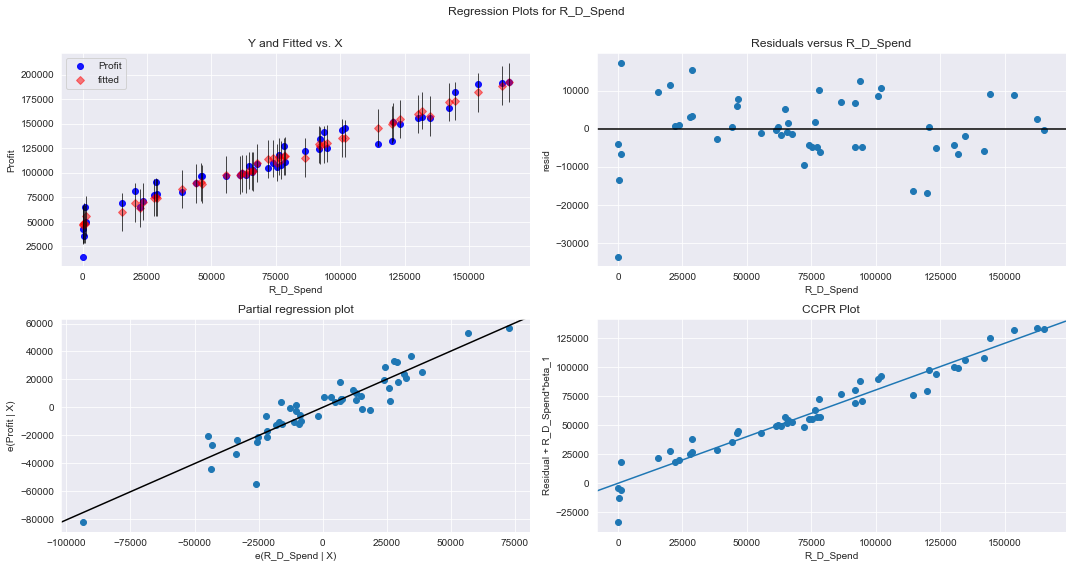

In [26]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, 'R_D_Spend',fig=fig)
plt.show()

eval_env: 1


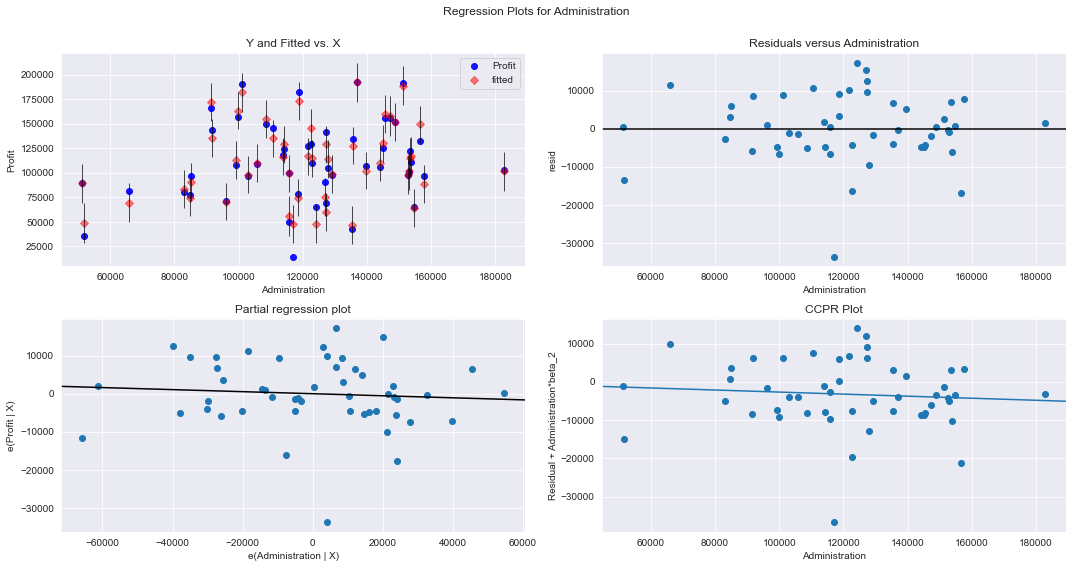

In [27]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, 'Administration',fig=fig)
plt.show()

eval_env: 1


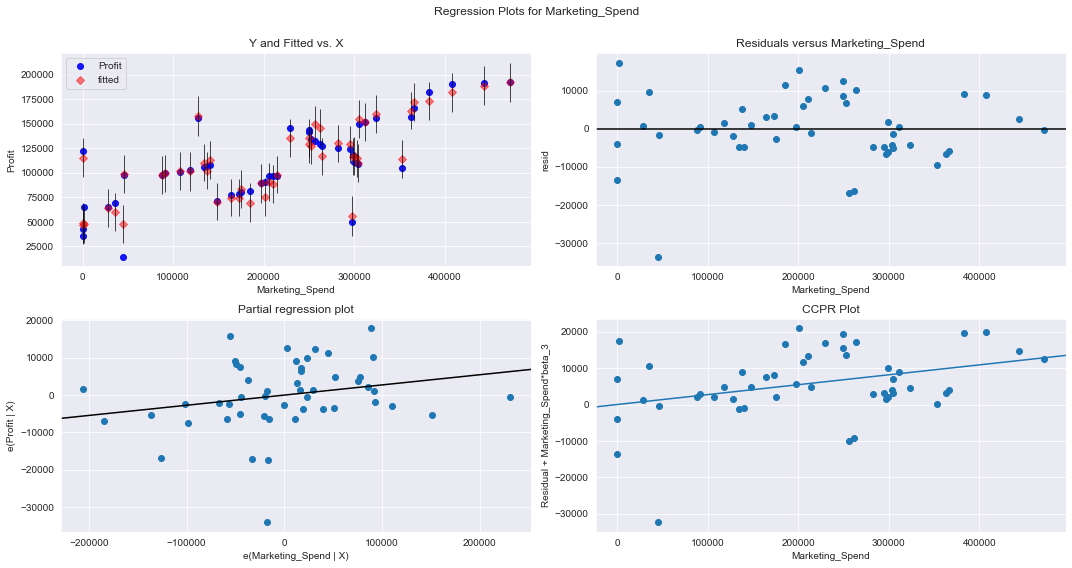

In [28]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, 'Marketing_Spend',fig=fig)
plt.show()

## Model Deletion Diagnostics
## Detecting Influencers/Outliers

### Cook's Distance
#### - As a general rule of thumb I'll Assume If Cook's Distance > 4/n then, it's an Outlier

In [29]:
cook_distance_threshold = 4/(df.shape[0])
cook_distance_threshold

0.08

In [30]:
model_influence = model.get_influence()
c, _ = model_influence.cooks_distance
c

array([3.21825244e-05, 3.27591036e-03, 3.23842699e-02, 2.17206555e-02,
       1.44833032e-02, 1.17158463e-02, 2.91766303e-03, 3.56513444e-03,
       4.04303948e-05, 4.86758017e-03, 1.51064757e-02, 1.63564959e-02,
       1.15516625e-02, 4.01422811e-03, 6.12934253e-02, 3.40013448e-02,
       8.33556413e-03, 3.30534399e-03, 2.16819303e-03, 4.07440577e-02,
       4.25137222e-04, 1.09844352e-02, 2.91768000e-03, 2.76030254e-04,
       5.04643588e-03, 3.00074623e-03, 3.41957068e-03, 2.98396413e-02,
       1.31590664e-03, 1.25992620e-04, 4.18505125e-05, 9.27434786e-06,
       7.08656521e-04, 1.28122674e-04, 2.09815032e-02, 6.69508674e-03,
       5.55314705e-02, 6.55050578e-05, 5.61547311e-02, 1.54279607e-03,
       1.84850929e-03, 1.97578066e-03, 1.36089280e-04, 2.05553171e-02,
       1.23156041e-04, 9.03234206e-02, 5.45303387e-02, 5.33885616e-03,
       1.90527441e-01, 2.88082293e-01])

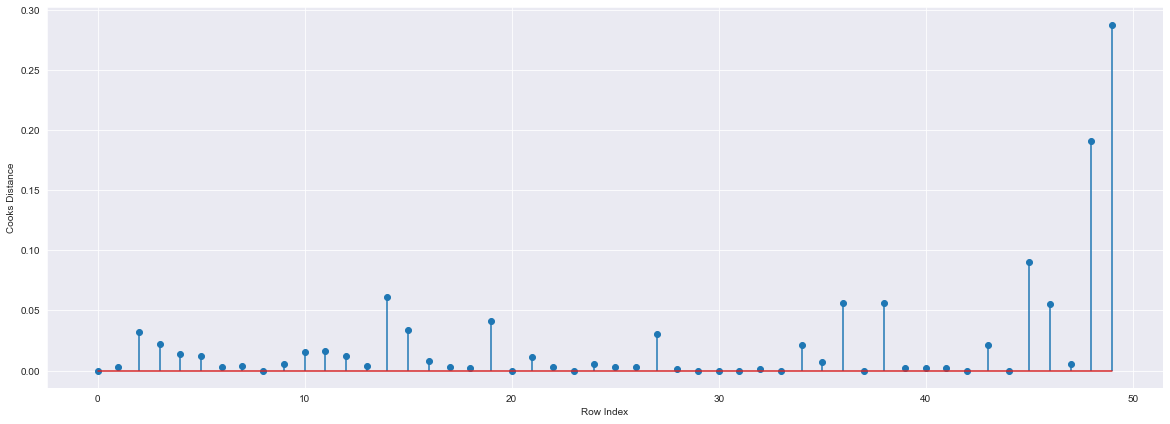

In [31]:
# Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(df)), np.round(c,3))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

##### **Insights**
##### -For index 48 & 49 the Cook's distance > 0.08 hence these points are influencial data points

In [33]:
# Index and value of Incfluencer where c is more than .5
np.argmax(c),np.max(c)

(49, 0.28808229275432673)

### Leverage Value using High Influence Points
- Points beyond Leverage_cutoff value are influencers
- Leverage_cutoff value = 3*(k+1)/n; k = No.of features & n = No. of Data Points

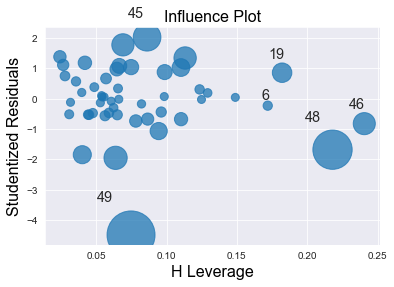

In [34]:
influence_plot(model)
plt.show()

In [36]:
k = df.shape[1]
n = df.shape[0]
leverage_cutoff = 3*((k+1)/n)
leverage_cutoff

0.36

In [35]:
df[df.index.isin([48,49])]

,R_D_Spend,Administration,Marketing_Spend,State,Profit
48,542.05,51743.15,0.00,New York,35673.41
49,0.00,116983.80,45173.06,California,14681.40


## Improving the Model

## Preparing Model 2

### As per the Insight generated from the Cook's distance we'll remove 48 & 49

In [37]:
df_new = df.drop(df.index[[48,49]],axis=0).reset_index()
df_new = df_new.drop(['index'],axis=1)
df_new.head(2)

,R_D_Spend,Administration,Marketing_Spend,State,Profit
0,165349.2,136897.80,471784.10,New York,192261.83
1,162597.7,151377.59,443898.53,California,191792.06


In [38]:
model2 = smf.ols('Profit~R_D_Spend+Administration+Marketing_Spend', data=df_new).fit()
# print(model2.summary())

In [40]:
# model2.params

In [41]:
# print(model2.tvalues, '\n', model2.pvalues)

In [42]:
model2.rsquared, model2.rsquared_adj, model2.aic

(0.9626766170294073, 0.960131840917776, 994.6690439260116)

In [43]:
model_r_square = ['model2',model2.rsquared]
R_Squared_list.append(model_r_square)
R_Squared_list

[['model', 0.9507459940683246], ['model2', 0.9626766170294073]]

### **Insight**
#### - `model2` is slightly better than `model1` since it has a better rsquared value

### Building Model n / Improving Further
- Note: This is not working properly

In [63]:
# c, _ = model2.get_influence().cooks_distance
# model_loop = smf.ols('Profit~R_D_Spend+Administration+Marketing_Spend', data=df_new).fit()

# while np.max(c) > cook_distance_threshold:
#     i = 1
#     print('np.max(c): ',np.max(c),'\n')
#     c, _ = model_loop.get_influence().cooks_distance
#     outlier_index = np.argmax(c)
#     print('outlier_index: ', outlier_index, '\n')
    
#     df_new = df_new.drop(index=[outlier_index],axis=0)
#     df_new.reset_index(drop=True)
#     print(df_new)
#     ##df_new = df_new.drop(['index'],axis=1)
#     model_loop = smf.ols('Profit~R_D_Spend+Administration+Marketing_Spend', data=df_new).fit()
#     model_r_square = ['model_'+str(i),model_loop.rsquared]
#     print('model_r_square: ',model_r_square, '\n')
#     i+=1
#     R_Squared_list.append(model_r_square)

np.max(c):  0.21475022092941304 

outlier_index:  19 

    R_D_Spend  Administration  Marketing_Spend       State     Profit
0   165349.20       136897.80        471784.10    New York  192261.83
1   162597.70       151377.59        443898.53  California  191792.06
2   153441.51       101145.55        407934.54     Florida  191050.39
3   144372.41       118671.85        383199.62    New York  182901.99
4   142107.34        91391.77        366168.42     Florida  166187.94
5   131876.90        99814.71        362861.36    New York  156991.12
6   134615.46       147198.87        127716.82  California  156122.51
7   130298.13       145530.06        323876.68     Florida  155752.60
8   120542.52       148718.95        311613.29    New York  152211.77
9   123334.88       108679.17        304981.62  California  149759.96
10  101913.08       110594.11        229160.95     Florida  146121.95
11  100671.96        91790.61        249744.55  California  144259.40
12   93863.75       127320.38      

KeyError: '[19] not found in axis'

## Preparing Model 3

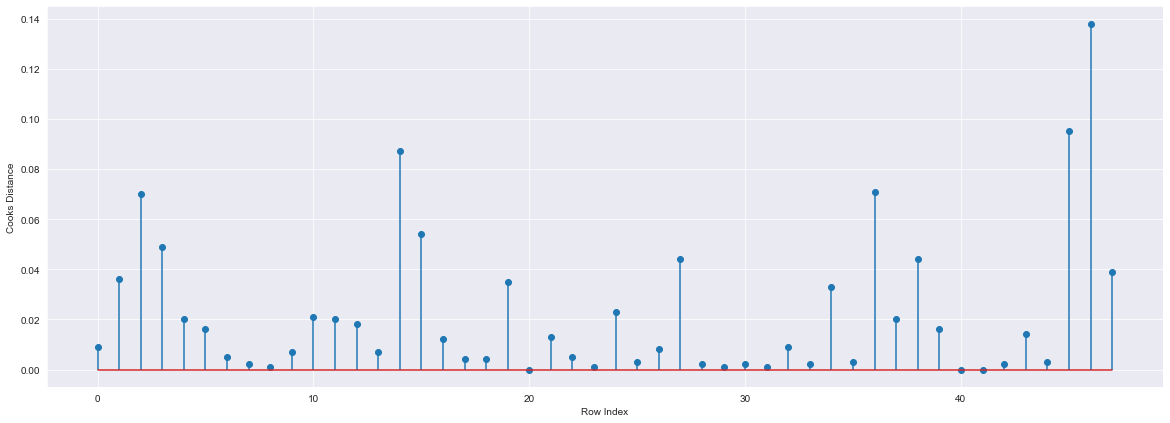

In [44]:
c, _ = model2.get_influence().cooks_distance

# Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(df_new)), np.round(c,3))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

### From the above Cook's distance chart index 14,45 & 46 have distance > 0.08

In [45]:
df_new2 = df_new.drop(df_new.index[[14,45,46]],axis=0).reset_index()
df_new2 = df_new2.drop(['index'],axis=1)
df_new2.head(2)

,R_D_Spend,Administration,Marketing_Spend,State,Profit
0,165349.2,136897.80,471784.10,New York,192261.83
1,162597.7,151377.59,443898.53,California,191792.06


In [46]:
model3 = smf.ols('Profit~R_D_Spend+Administration+Marketing_Spend', data=df_new2).fit()

In [47]:
# model3.params

In [48]:
# print(model3.tvalues, '\n', model3.pvalues)

In [49]:
model3.rsquared, model3.rsquared_adj, model3.aic

(0.9670227733633301, 0.9646098055606469, 924.7318623888405)

In [50]:
model_r_square = ['model3',model3.rsquared]
R_Squared_list.append(model_r_square)
R_Squared_list

[['model', 0.9507459940683246],
 ['model2', 0.9626766170294073],
 ['model3', 0.9670227733633301]]

## Preparing Model 4

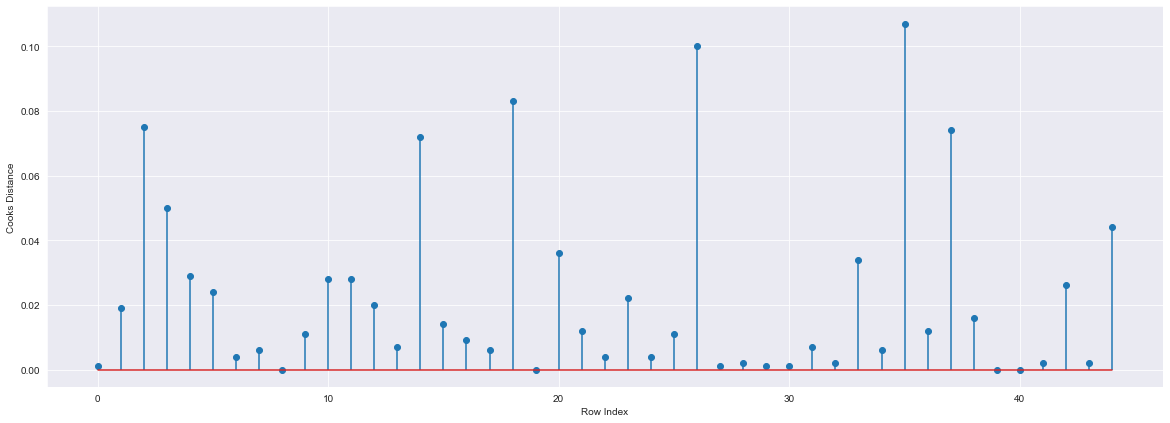

In [51]:
c, _ = model3.get_influence().cooks_distance

# Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(df_new2)), np.round(c,3))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

### From the above Cook's distance chart index 18,26 & 35 have distance > 0.08

In [52]:
df_new3 = df_new2.drop(df_new2.index[[18,26,35]],axis=0).reset_index()
df_new3 = df_new3.drop(['index'],axis=1)
df_new3.head(2)

,R_D_Spend,Administration,Marketing_Spend,State,Profit
0,165349.2,136897.80,471784.10,New York,192261.83
1,162597.7,151377.59,443898.53,California,191792.06


In [53]:
model4 = smf.ols('Profit~R_D_Spend+Administration+Marketing_Spend', data=df_new3).fit()

In [54]:
# model4.params

In [55]:
# print(model4.tvalues, '\n', model4.pvalues)

In [56]:
model4.rsquared, model4.rsquared_adj, model4.aic

(0.9727840588916423, 0.9706354319620352, 857.729827206495)

In [57]:
model_r_square = ['model4',model4.rsquared]
R_Squared_list.append(model_r_square)
R_Squared_list

[['model', 0.9507459940683246],
 ['model2', 0.9626766170294073],
 ['model3', 0.9670227733633301],
 ['model4', 0.9727840588916423]]

## Preparing Model 5

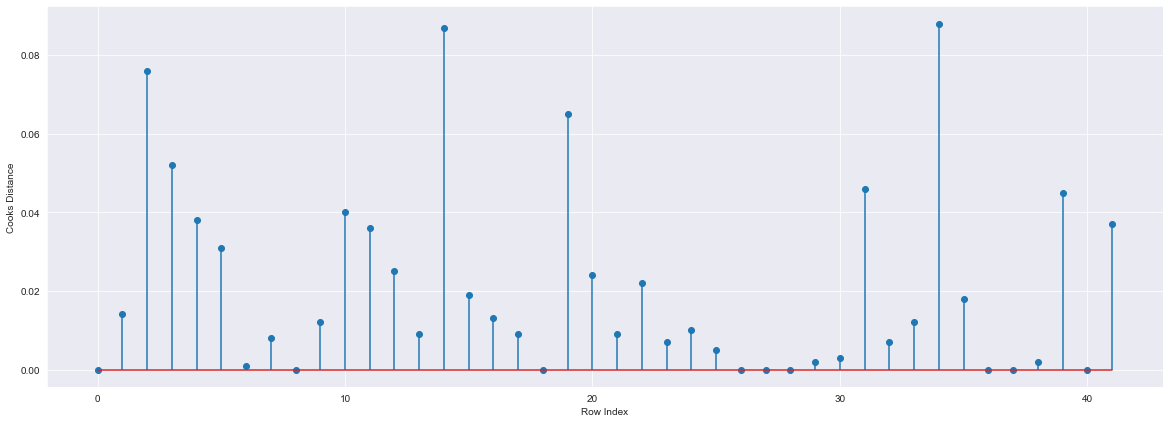

In [59]:
c, _ = model4.get_influence().cooks_distance

# Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(df_new3)), np.round(c,3))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

### From the above Cook's distance chart index 14 & 34 have distance > 0.08

In [60]:
df_new4 = df_new3.drop(df_new3.index[[14,34]],axis=0).reset_index()
df_new4 = df_new4.drop(['index'],axis=1)
df_new4.head(2)

,R_D_Spend,Administration,Marketing_Spend,State,Profit
0,165349.2,136897.80,471784.10,New York,192261.83
1,162597.7,151377.59,443898.53,California,191792.06


In [61]:
model5 = smf.ols('Profit~R_D_Spend+Administration+Marketing_Spend', data=df_new4).fit()

In [62]:
# model5.params

In [63]:
# print(model5.tvalues, '\n', model5.pvalues)

In [64]:
model5.rsquared, model5.rsquared_adj, model5.aic

(0.9785801571833451, 0.9767951702819572, 808.5035667158954)

In [65]:
model_r_square = ['model5',model5.rsquared]
R_Squared_list.append(model_r_square)
R_Squared_list

[['model', 0.9507459940683246],
 ['model2', 0.9626766170294073],
 ['model3', 0.9670227733633301],
 ['model4', 0.9727840588916423],
 ['model5', 0.9785801571833451]]

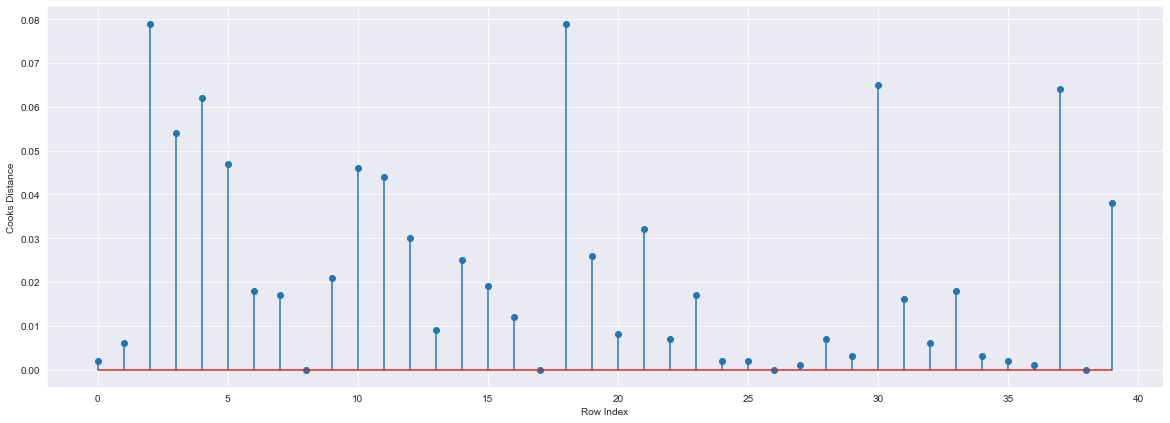

In [66]:
c, _ = model5.get_influence().cooks_distance

# Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(df_new4)), np.round(c,3))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

# **Insight:**
## Now there is not influencer points, so will stop here

## Make a table containing R^2 value for each prepared model.

In [67]:
R_Squared_df = pd.DataFrame(R_Squared_list,columns=['Model_Name', 'R_Square_Value'])
R_Squared_df

,Model_Name,R_Square_Value
0,model,0.950746
1,model2,0.962677
2,model3,0.967023
3,model4,0.972784
4,model5,0.978580
